In [1]:
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS

import sys
sys.path.append("process_tools")
import random

from cut_resize_tools import *
from Astronomy import *

In [2]:
# Constants
vsmooth = 0
thresh = 0
sigma = 0
sch_rms = 10
ech_rms = 90
sch_ii = 0
ech_ii = 320
percentile = 100.0
sigma_multiply = None
maximum_mode = "normal"

cut_size_list = [256, 128, 64]
integrate_layer_num = 320
obj_size = 100

In [3]:
fits_path = "/home/filament/fujimoto/Cygnus-X_CAE/fits/Cygnus_sp16_vs-40_ve040_dv0.25_12CO_Tmb.fits"
hdu = fits.open(fits_path)[0]
raw_data = hdu.data
wcs = WCS(hdu.header)

Changed DATE-OBS from '2016-01-13        ' to '2016-01-13T00:00:00.0''. [astropy.wcs.wcs]


In [4]:
processed_data_list = []
for pix in cut_size_list:
    print(f"Processing data clipped to {pix} pixels...")

    # Step1: スライス
    cut_data = slide(raw_data, pix+4)
    print(f"Number of data clipped to {pix} pixels: {len(cut_data)}")

    cut_data = remove_nan(cut_data)
    print(f"Number of data after deletion: {len(cut_data)}")

    # Step2: 並列前処理
    processed_list = parallel_processing(
                                        function=process_data_segment, 
                                        target=cut_data,
                                        vsmooth=vsmooth,
                                        sch_rms=sch_rms, 
                                        ech_rms=ech_rms,
                                        sch_ii=sch_ii,
                                        ech_ii=ech_ii,
                                        sigma=sigma, 
                                        thresh=thresh, 
                                        # integrate_layer_num=integrate_layer_num
                                        integrate_layer_num=len(cut_data[0])
                                        )
    processed_data_list.append(processed_list)

Processing data clipped to 256 pixels...
Number of data clipped to 256 pixels: 735
Number of data after deletion: 211


/usr/local/lib/python3.8/dist-packages/astropy/convolution/kernels.py:97: RuntimeWarning: divide by zero encountered in scalar divide
  self._model = models.Gaussian1D(1.0 / (np.sqrt(2 * np.pi) * stddev), 0, stddev)
/usr/local/lib/python3.8/dist-packages/astropy/modeling/functional_models.py:213: RuntimeWarning: invalid value encountered in divide
  return amplitude * np.exp(-0.5 * (x - mean) ** 2 / stddev**2)
/usr/local/lib/python3.8/dist-packages/astropy/convolution/kernels.py:97: RuntimeWarning: divide by zero encountered in scalar divide
  self._model = models.Gaussian1D(1.0 / (np.sqrt(2 * np.pi) * stddev), 0, stddev)
/usr/local/lib/python3.8/dist-packages/astropy/modeling/functional_models.py:213: RuntimeWarning: invalid value encountered in divide
  return amplitude * np.exp(-0.5 * (x - mean) ** 2 / stddev**2)
/usr/local/lib/python3.8/dist-packages/astropy/convolution/kernels.py:97: RuntimeWarning: divide by zero encountered in scalar divide
  self._model = models.Gaussian1D(1.0 

Processing data clipped to 128 pixels...
Number of data clipped to 128 pixels: 3285
Number of data after deletion: 1389


/usr/local/lib/python3.8/dist-packages/astropy/convolution/kernels.py:97: RuntimeWarning: divide by zero encountered in scalar divide
  self._model = models.Gaussian1D(1.0 / (np.sqrt(2 * np.pi) * stddev), 0, stddev)
/usr/local/lib/python3.8/dist-packages/astropy/modeling/functional_models.py:213: RuntimeWarning: invalid value encountered in divide
  return amplitude * np.exp(-0.5 * (x - mean) ** 2 / stddev**2)
/usr/local/lib/python3.8/dist-packages/astropy/convolution/kernels.py:97: RuntimeWarning: divide by zero encountered in scalar divide
  self._model = models.Gaussian1D(1.0 / (np.sqrt(2 * np.pi) * stddev), 0, stddev)
/usr/local/lib/python3.8/dist-packages/astropy/modeling/functional_models.py:213: RuntimeWarning: invalid value encountered in divide
  return amplitude * np.exp(-0.5 * (x - mean) ** 2 / stddev**2)
/usr/local/lib/python3.8/dist-packages/astropy/convolution/kernels.py:97: RuntimeWarning: divide by zero encountered in scalar divide
  self._model = models.Gaussian1D(1.0 

Processing data clipped to 64 pixels...
Number of data clipped to 64 pixels: 13050
Number of data after deletion: 6325


/usr/local/lib/python3.8/dist-packages/astropy/convolution/kernels.py:97: RuntimeWarning: divide by zero encountered in scalar divide
  self._model = models.Gaussian1D(1.0 / (np.sqrt(2 * np.pi) * stddev), 0, stddev)
/usr/local/lib/python3.8/dist-packages/astropy/modeling/functional_models.py:213: RuntimeWarning: invalid value encountered in divide
  return amplitude * np.exp(-0.5 * (x - mean) ** 2 / stddev**2)
/usr/local/lib/python3.8/dist-packages/astropy/convolution/kernels.py:97: RuntimeWarning: divide by zero encountered in scalar divide
  self._model = models.Gaussian1D(1.0 / (np.sqrt(2 * np.pi) * stddev), 0, stddev)
/usr/local/lib/python3.8/dist-packages/astropy/modeling/functional_models.py:213: RuntimeWarning: invalid value encountered in divide
  return amplitude * np.exp(-0.5 * (x - mean) ** 2 / stddev**2)
/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out,

In [5]:
all_list = []
for cut_list in processed_data_list:
    for data in cut_list:
        all_list.append(data)

In [6]:
len(all_list)

7925

In [7]:
num_index = np.random.choice(len(all_list), 20)
num_index = sorted(num_index)
print(num_index)

[81, 1262, 1404, 1415, 1941, 2039, 2106, 2493, 2746, 2939, 3012, 3325, 3925, 4150, 5087, 6093, 6523, 7009, 7561, 7749]


In [8]:
start = ch2v(0, wcs)
end = ch2v(len(raw_data), wcs)
interval = np.arange(start, end, (end-start)/len(raw_data))

In [9]:
print(start)
print(start_plus_10)
print(end)

-39.875


NameError: name 'start_plus_10' is not defined

In [10]:
start = ch2v(0, wcs)
start_plus_10 = v2ch(start + 10, wcs)
print(start)
print(start_plus_10)

-39.875
40


In [11]:
print(interval)

[-39.875 -39.625 -39.375 -39.125 -38.875 -38.625 -38.375 -38.125 -37.875
 -37.625 -37.375 -37.125 -36.875 -36.625 -36.375 -36.125 -35.875 -35.625
 -35.375 -35.125 -34.875 -34.625 -34.375 -34.125 -33.875 -33.625 -33.375
 -33.125 -32.875 -32.625 -32.375 -32.125 -31.875 -31.625 -31.375 -31.125
 -30.875 -30.625 -30.375 -30.125 -29.875 -29.625 -29.375 -29.125 -28.875
 -28.625 -28.375 -28.125 -27.875 -27.625 -27.375 -27.125 -26.875 -26.625
 -26.375 -26.125 -25.875 -25.625 -25.375 -25.125 -24.875 -24.625 -24.375
 -24.125 -23.875 -23.625 -23.375 -23.125 -22.875 -22.625 -22.375 -22.125
 -21.875 -21.625 -21.375 -21.125 -20.875 -20.625 -20.375 -20.125 -19.875
 -19.625 -19.375 -19.125 -18.875 -18.625 -18.375 -18.125 -17.875 -17.625
 -17.375 -17.125 -16.875 -16.625 -16.375 -16.125 -15.875 -15.625 -15.375
 -15.125 -14.875 -14.625 -14.375 -14.125 -13.875 -13.625 -13.375 -13.125
 -12.875 -12.625 -12.375 -12.125 -11.875 -11.625 -11.375 -11.125 -10.875
 -10.625 -10.375 -10.125  -9.875  -9.625  -9.375  -

In [12]:
ex_data = all_list[0]
mean = np.mean(ex_data, axis=(1, 2))
print(np.argmax(mean))
max_intens_v = interval[np.argmax(mean)]
print(max_intens_v)

156
-0.875


In [16]:
width = 15
num = 0

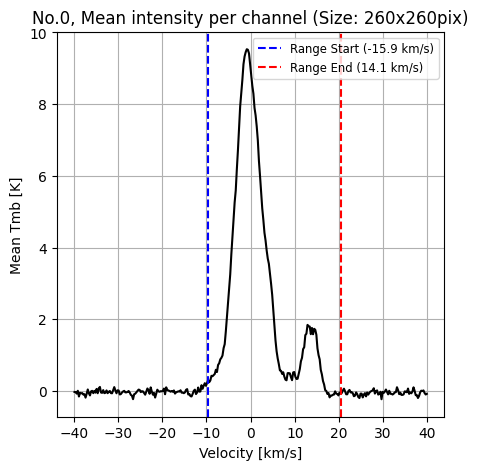

In [22]:
data = all_list[num]
mean = np.mean(data, axis=(1, 2))
start_ch = 121
end_ch = 241
start_ch = ch2v(start_ch, wcs)
end_ch = ch2v(end_ch, wcs)

fig = plt.figure(figsize=(5,5))
plt.plot(interval, mean, color="k")
plt.title(f"No.{num}, Mean intensity per channel (Size: {data.shape[1]}x{data.shape[1]}pix)")
# ax.set_ylim(0, 12)

plt.axvline(x=start_ch, color='blue', linestyle='--', label=f'Range Start ({start_v:.1f} km/s)')
plt.axvline(x=end_ch, color='red', linestyle='--', label=f'Range End ({end_v:.1f} km/s)')

# for i in range(121, 241, 4):
#     # print(i)
#     plt.axvline(x=i, color='k', linestyle='-', linewidth=0.5)

plt.xlabel("Velocity [km/s]")
plt.ylabel("Mean Tmb [K]") 
plt.legend(fontsize="small")
plt.grid()
plt.savefig(f"line_ex_No{num}.png")
plt.show()

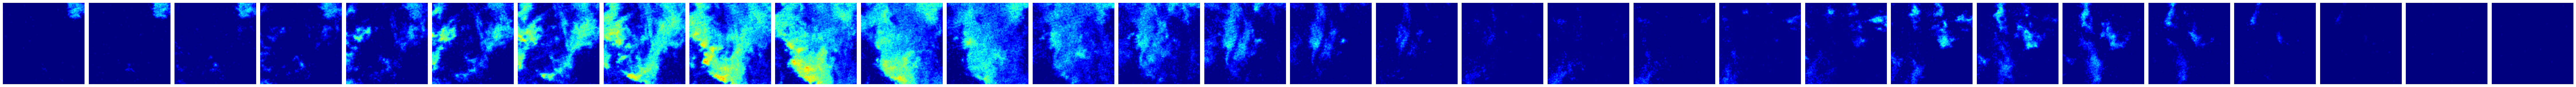

In [44]:
max_thresh = 132.72668899584303

image1 = process_data_segment(data, 5, 10, 90, 121, 241, 2, 1, 30)
image1 = gaussian_filter(image1)
image1 = np.array(normalization_thresh(image1, max_thresh))

fig, axes = plt.subplots(1, len(image1), figsize=(3*len(image1), 7))
for j in range(len(image1)):
    axes[j].imshow(image1[j, :, :], vmin=0, vmax=1, cmap="jet")
    axes[j].axis('off')

plt.tight_layout()
plt.savefig(f"line_ex_image_No{num}.png", format="png")
plt.show()

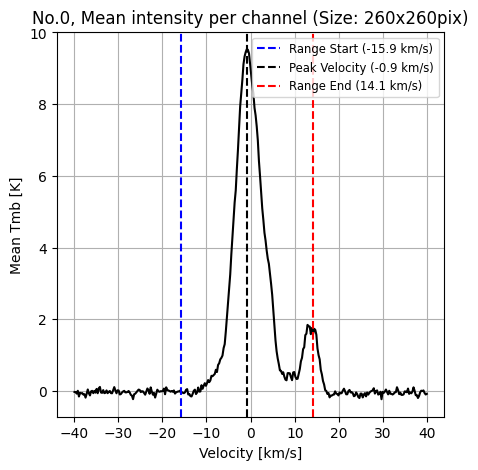

In [24]:
data = all_list[num]
mean = np.mean(data, axis=(1, 2))
max_intens_v = interval[np.argmax(mean)]
start_v = max_intens_v - width
end_v = max_intens_v + width

fig = plt.figure(figsize=(5,5))
plt.plot(interval, mean, color="k")
plt.title(f"No.{num}, Mean intensity per channel (Size: {data.shape[1]}x{data.shape[1]}pix)")
# ax.set_ylim(0, 12)

plt.axvline(x=start_v, color='blue', linestyle='--', label=f'Range Start ({start_v:.1f} km/s)')
plt.axvline(x=max_intens_v, color='k', linestyle='--', label=f'Peak Velocity ({max_intens_v:.1f} km/s)')
plt.axvline(x=end_v, color='red', linestyle='--', label=f'Range End ({end_v:.1f} km/s)')

plt.xlabel("Velocity [km/s]")
plt.ylabel("Mean Tmb [K]") 
plt.legend(fontsize="small")
plt.grid()
plt.savefig(f"./select_velocity_plots/width-{width}/No{num}")
plt.show()

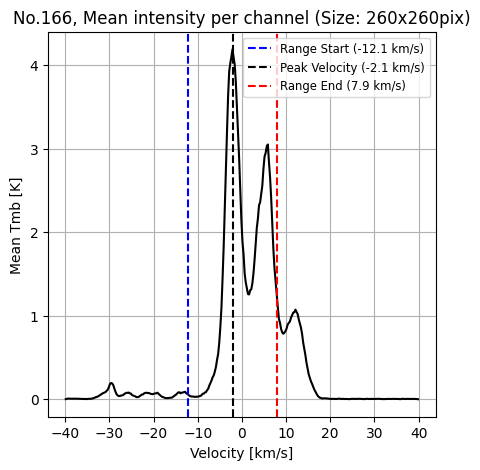

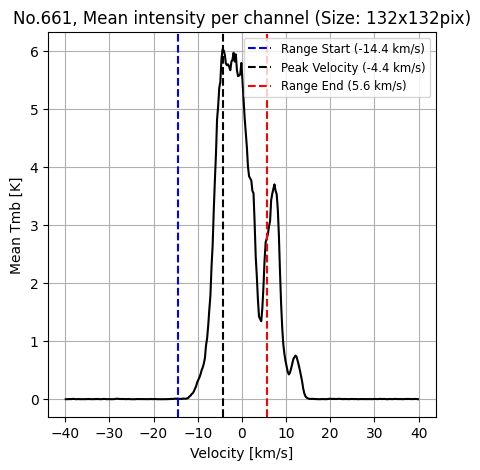

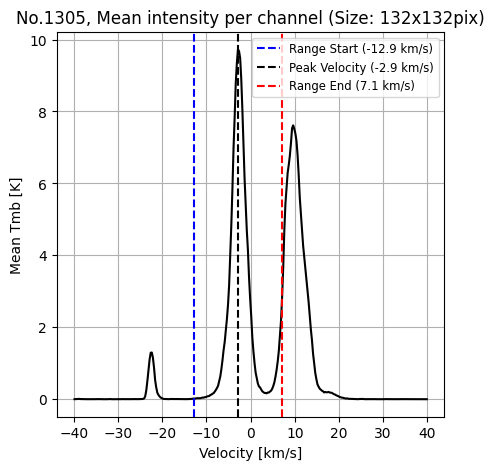

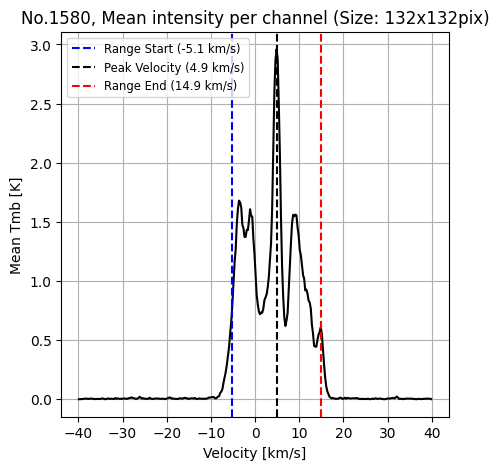

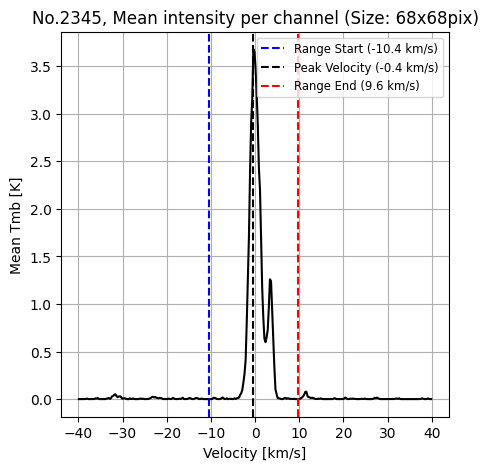

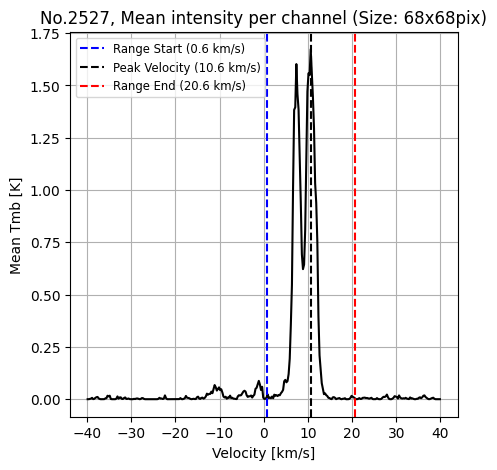

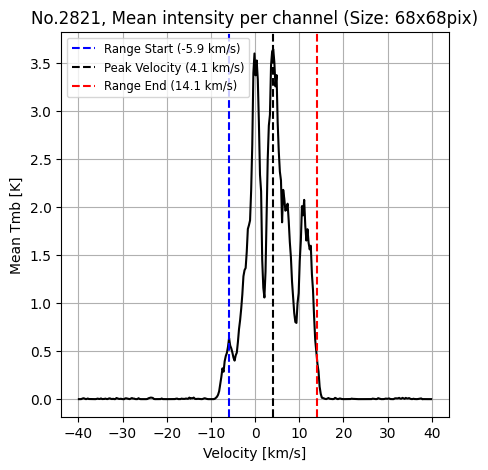

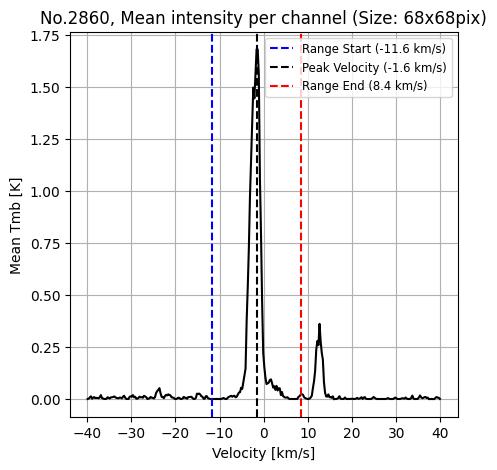

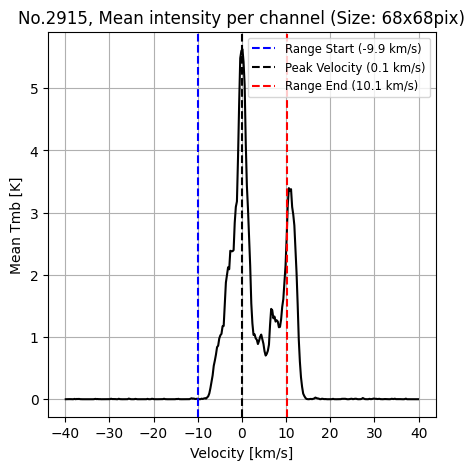

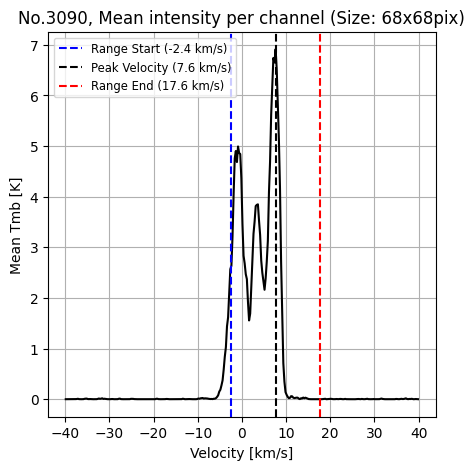

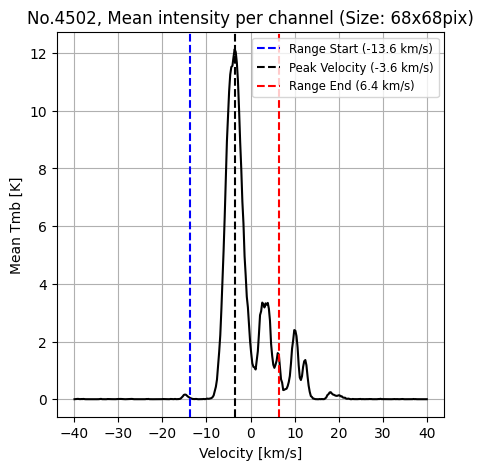

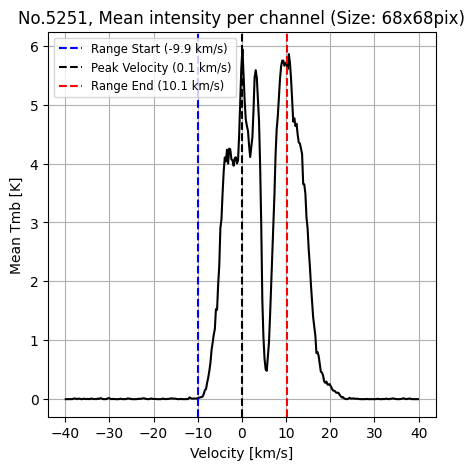

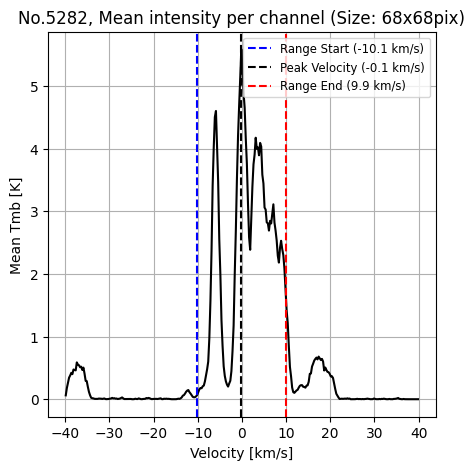

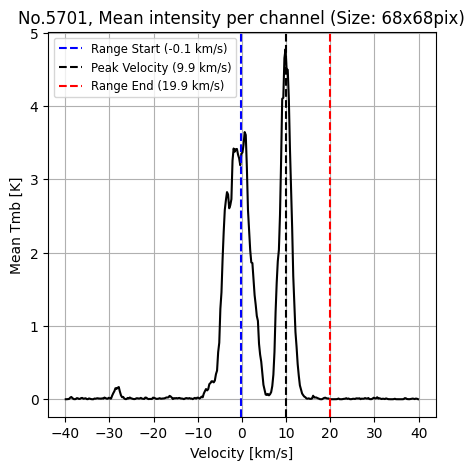

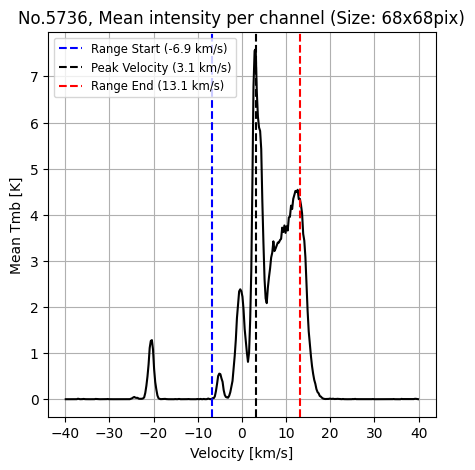

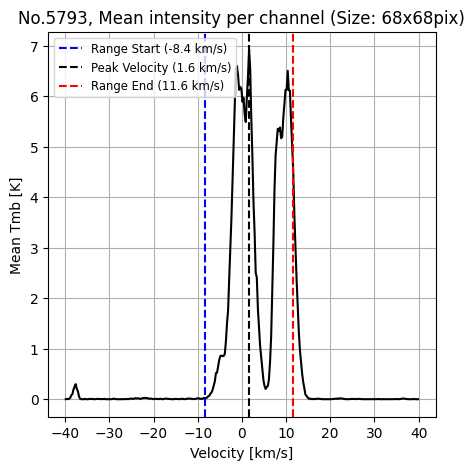

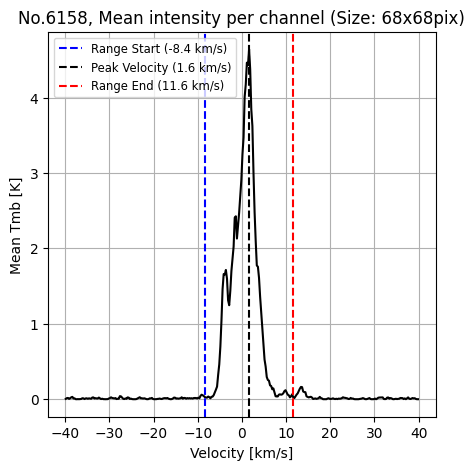

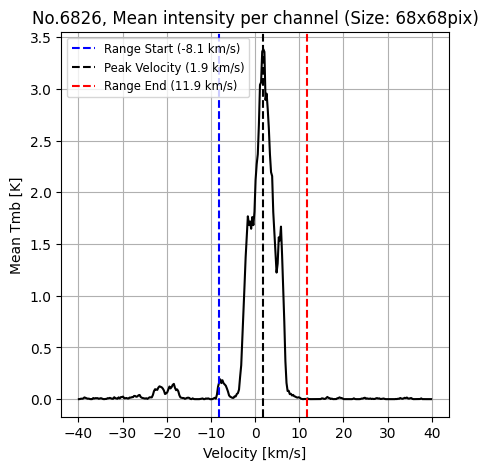

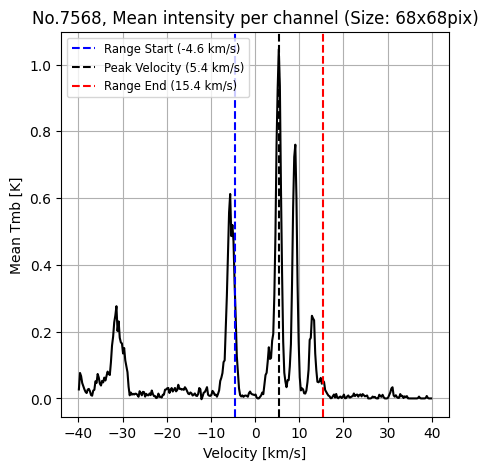

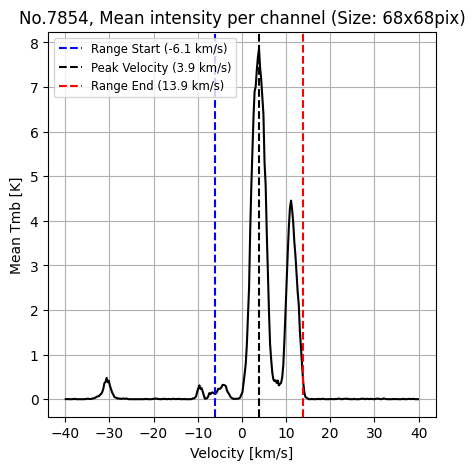

In [11]:
# start_v = -10
# end_v = 10

for num in num_index:
    data = all_list[num]
    mean = np.mean(data, axis=(1, 2))
    max_intens_v = interval[np.argmax(mean)]
    start_v = max_intens_v - width
    end_v = max_intens_v + width

    fig = plt.figure(figsize=(5,5))
    plt.plot(interval, mean, color="k")
    plt.title(f"No.{num}, Mean intensity per channel (Size: {data.shape[1]}x{data.shape[1]}pix)")
    # ax.set_ylim(0, 12)

    plt.axvline(x=start_v, color='blue', linestyle='--', label=f'Range Start ({start_v:.1f} km/s)')
    plt.axvline(x=max_intens_v, color='k', linestyle='--', label=f'Peak Velocity ({max_intens_v:.1f} km/s)')
    plt.axvline(x=end_v, color='red', linestyle='--', label=f'Range End ({end_v:.1f} km/s)')
    
    plt.xlabel("Velocity [km/s]")
    plt.ylabel("Mean Tmb [K]") 
    plt.legend(fontsize="small")
    plt.grid()
    # plt.savefig(f"./select_velocity_plots/width-{width}/No{num}")
    plt.show()

In [12]:
start = ch2v(0, wcs)
end = ch2v(len(raw_data), wcs)
print(start)
print(end)
print(np.arange(start, end, (end-start)/len(raw_data)))
print(len(np.arange(start, end, (end-start)/len(raw_data))))

-39.875
40.125
[-39.875 -39.625 -39.375 -39.125 -38.875 -38.625 -38.375 -38.125 -37.875
 -37.625 -37.375 -37.125 -36.875 -36.625 -36.375 -36.125 -35.875 -35.625
 -35.375 -35.125 -34.875 -34.625 -34.375 -34.125 -33.875 -33.625 -33.375
 -33.125 -32.875 -32.625 -32.375 -32.125 -31.875 -31.625 -31.375 -31.125
 -30.875 -30.625 -30.375 -30.125 -29.875 -29.625 -29.375 -29.125 -28.875
 -28.625 -28.375 -28.125 -27.875 -27.625 -27.375 -27.125 -26.875 -26.625
 -26.375 -26.125 -25.875 -25.625 -25.375 -25.125 -24.875 -24.625 -24.375
 -24.125 -23.875 -23.625 -23.375 -23.125 -22.875 -22.625 -22.375 -22.125
 -21.875 -21.625 -21.375 -21.125 -20.875 -20.625 -20.375 -20.125 -19.875
 -19.625 -19.375 -19.125 -18.875 -18.625 -18.375 -18.125 -17.875 -17.625
 -17.375 -17.125 -16.875 -16.625 -16.375 -16.125 -15.875 -15.625 -15.375
 -15.125 -14.875 -14.625 -14.375 -14.125 -13.875 -13.625 -13.375 -13.125
 -12.875 -12.625 -12.375 -12.125 -11.875 -11.625 -11.375 -11.125 -10.875
 -10.625 -10.375 -10.125  -9.875  -9